# This notebook creates an overview table out of calendar.csv, and it plots that graph.


In [1]:
import pandas
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

def plotAvailability(path, savePath):
    """
    This function will crate a table and a graf for the availability of rooms for a city.
    :param path: the path to the calendar.csv
    :return: a nice picture of the graf.
    """
    dataframe= pandas.read_csv(path)
    dataframePivod = pandas.get_dummies(dataframe.pivot(index="date", columns="listing_id", values="available"), prefix_sep='', prefix='').sum(axis=1, level=0)
    print(str(dataframePivod))
    dataframePivod['t'].plot()
    plt.xticks(rotation=90)
    plt.savefig(savePath, transparent=True, dpi=600)
    return plt

# Copenhagen

                f     t
date                   
2022-09-24   9140   414
2022-09-25  12770  1043
2022-09-26  12468  1345
2022-09-27  12287  1526
2022-09-28  12234  1579
...           ...   ...
2023-09-28      1     0
2023-09-29      1     0
2023-09-30      1     0
2023-10-01      1     0
2023-10-02      1     0

[374 rows x 2 columns]


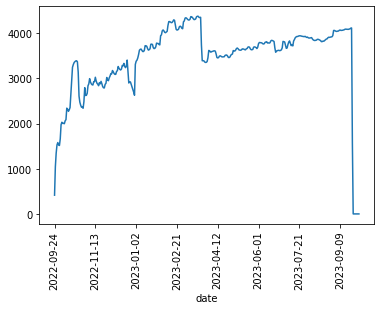

In [2]:
copenhagen = plotAvailability('../../data/Copenhagen/calendar.csv', '../../data/Copenhagen/out/2022_2023.svg')

# Oslo

               f    t
date                 
2022-09-24  5036  331
2022-09-25  4660  707
2022-09-26  4497  870
2022-09-27  4444  923
2022-09-28  4400  967
...          ...  ...
2023-09-28     1    0
2023-09-29     1    0
2023-09-30     1    0
2023-10-01     1    0
2023-10-02     1    0

[374 rows x 2 columns]


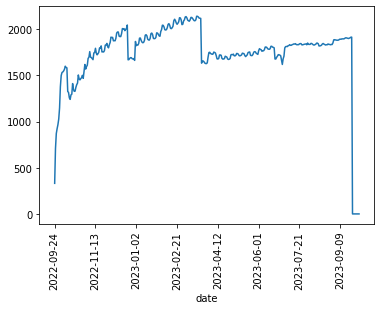

In [3]:
oslo = plotAvailability('../../data/Oslo/calendar.csv', '../../data/Oslo/out/2022_2023.svg')

# Stockholm

               f    t
date                 
2022-09-24  3757  227
2022-09-25  3411  573
2022-09-26  3285  699
2022-09-27  3238  746
2022-09-28  3224  760
...          ...  ...
2023-09-28     1    1
2023-09-29     1    1
2023-09-30     1    1
2023-10-01     1    1
2023-10-02     1    1

[374 rows x 2 columns]


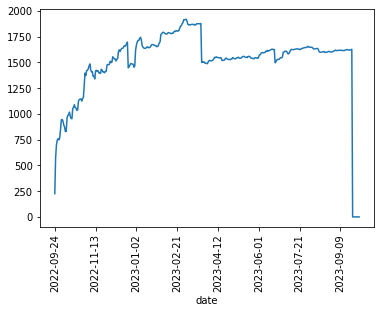

In [4]:
stockholm = plotAvailability('../../data/Stockholm/calendar.csv', '../../data/Stockholm/out/2022_2023.svg')